In [35]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import csv
import re
import nltk
from nltk import sent_tokenize
from nltk import word_tokenize

Data link: https://www.kaggle.com/datasets/datasnaek/mbti-type/data

In [36]:
# read data from file to a pandas dataframe
mbti_df = pd.read_csv('./mbti_data.csv', header = None, names = ['Type', 'Posts'])
mbti_df


,Type,Posts
0,INFJ,'http://www.youtube.com/watch?v=qsXHcwe3krw|||...
1,ENTP,'I'm finding the lack of me in these posts ver...
2,INTP,'Good one _____ https://www.youtube.com/wat...
3,INTJ,"'Dear INTP, I enjoyed our conversation the o..."
4,ENTJ,'You're fired.|||That's another silly misconce...
...,...,...
8670,ISFP,'https://www.youtube.com/watch?v=t8edHB_h908||...
8671,ENFP,'So...if this thread already exists someplace ...
8672,INTP,'So many questions when i do these things. I ...
8673,INFP,'I am very conflicted right now when it comes ...


In [37]:
mbti_df['Type'] = mbti_df['Type'].astype('category')
mbti_df['Type']

0       INFJ
1       ENTP
2       INTP
3       INTJ
4       ENTJ
        ... 
8670    ISFP
8671    ENFP
8672    INTP
8673    INFP
8674    INFP
Name: Type, Length: 8675, dtype: category
Categories (16, object): ['ENFJ', 'ENFP', 'ENTJ', 'ENTP', ..., 'ISFJ', 'ISFP', 'ISTJ', 'ISTP']

In [38]:
mbti_df['Type'].value_counts()

INFP    1832
INFJ    1470
INTP    1304
INTJ    1091
ENTP     685
ENFP     675
ISTP     337
ISFP     271
ENTJ     231
ISTJ     205
ENFJ     190
ISFJ     166
ESTP      89
ESFP      48
ESFJ      42
ESTJ      39
Name: Type, dtype: int64

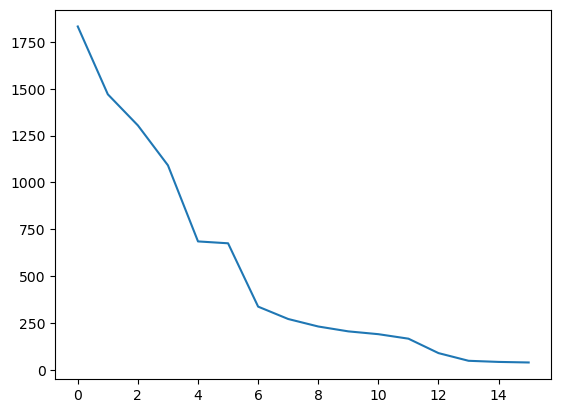

In [39]:
plt.plot(mbti_df['Type'].value_counts().values)

In [40]:
mbti_df['Posts'] = mbti_df['Posts'].astype('str')
mbti_df['Posts']

0       'http://www.youtube.com/watch?v=qsXHcwe3krw|||...
1       'I'm finding the lack of me in these posts ver...
2       'Good one  _____   https://www.youtube.com/wat...
3       'Dear INTP,   I enjoyed our conversation the o...
4       'You're fired.|||That's another silly misconce...
                              ...                        
8670    'https://www.youtube.com/watch?v=t8edHB_h908||...
8671    'So...if this thread already exists someplace ...
8672    'So many questions when i do these things.  I ...
8673    'I am very conflicted right now when it comes ...
8674    'It has been too long since I have been on per...
Name: Posts, Length: 8675, dtype: object

In [41]:
def clean_text(text):
    text = text.lower()
    text = re.sub(r'http\S+', r' ', text)
    text = re.sub(r"'", r' ', text)
    return text

In [42]:
# expand the posts into a list of posts
expanded_posts = []

for i, r in mbti_df.iterrows():
    for j in r:
        posts = r['Posts'].split('|||')
        for post in posts:
            if post:
                expanded_posts.append([r['Type'], post])

In [43]:
expanded_mbti_df = pd.DataFrame(expanded_posts, columns=['Type', 'Post'])
expanded_mbti_df

,Type,Post
0,INFJ,'http://www.youtube.com/watch?v=qsXHcwe3krw
1,INFJ,http://41.media.tumblr.com/tumblr_lfouy03PMA1q...
2,INFJ,enfp and intj moments https://www.youtube.com...
3,INFJ,What has been the most life-changing experienc...
4,INFJ,http://www.youtube.com/watch?v=vXZeYwwRDw8 h...
...,...,...
843509,INFP,I was going to close my facebook a few months ...
843510,INFP,30 Seconds to Mars - All of my collections. It...
843511,INFP,"I have seen it, and i agree. I did actually th..."
843512,INFP,Ok so i have just watched Underworld 4 (Awaken...


In [44]:
expanded_mbti_df['Post']= expanded_mbti_df['Post'].apply(clean_text)
expanded_mbti_df

,Type,Post
0,INFJ,
1,INFJ,
2,INFJ,enfp and intj moments sportscenter not top...
3,INFJ,what has been the most life-changing experienc...
4,INFJ,on repeat for most of today.
...,...,...
843509,INFP,i was going to close my facebook a few months ...
843510,INFP,30 seconds to mars - all of my collections. it...
843511,INFP,"i have seen it, and i agree. i did actually th..."
843512,INFP,ok so i have just watched underworld 4 (awaken...


In [45]:
expanded_mbti_df.shape

(843514, 2)

In [46]:
# Drop rows where 'Post' has empty or whitespace-only cells
expanded_mbti_df = expanded_mbti_df[expanded_mbti_df['Post'].str.strip().str.len() > 0]
expanded_mbti_df

,Type,Post
2,INFJ,enfp and intj moments sportscenter not top...
3,INFJ,what has been the most life-changing experienc...
4,INFJ,on repeat for most of today.
5,INFJ,may the perc experience immerse you.
6,INFJ,the last thing my infj friend posted on his fa...
...,...,...
843509,INFP,i was going to close my facebook a few months ...
843510,INFP,30 seconds to mars - all of my collections. it...
843511,INFP,"i have seen it, and i agree. i did actually th..."
843512,INFP,ok so i have just watched underworld 4 (awaken...


In [47]:
null_sum = expanded_mbti_df.isnull().sum()
null_sum

Type    0
Post    0
dtype: int64

In [48]:
expanded_mbti_df.shape

(822192, 2)

In [49]:
# Define a function to strip periods and ellipses from a text
def strip_periods_and_ellipses(text):
    return text.replace('.', '').replace('...', '')

In [50]:
expanded_mbti_df = expanded_mbti_df.applymap(strip_periods_and_ellipses)

In [51]:
expanded_mbti_df['Post']

2         enfp and intj moments     sportscenter not top...
3         what has been the most life-changing experienc...
4                               on repeat for most of today
5                       may the perc experience immerse you
6         the last thing my infj friend posted on his fa...
                                ...                        
843509    i was going to close my facebook a few months ...
843510    30 seconds to mars - all of my collections it ...
843511    i have seen it, and i agree i did actually thi...
843512    ok so i have just watched underworld 4 (awaken...
843513    i would never want to turn off my emotions som...
Name: Post, Length: 822192, dtype: object

In [52]:
from nltk.stem import PorterStemmer
ps = PorterStemmer()

In [53]:
from nltk.stem import WordNetLemmatizer 
lemmatizer = WordNetLemmatizer()

In [54]:
lemmatized_mbti_df = expanded_mbti_df.copy()

lemmatized_mbti_df['Post'] = [word_tokenize(post) for post in lemmatized_mbti_df['Post']]
lemmatized_mbti_df['Post'] = lemmatized_mbti_df['Post'].apply(lambda posts_words: [lemmatizer.lemmatize(word) for word in posts_words])


lemmatized_mbti_df

,Type,Post
2,INFJ,"[enfp, and, intj, moment, sportscenter, not, t..."
3,INFJ,"[what, ha, been, the, most, life-changing, exp..."
4,INFJ,"[on, repeat, for, most, of, today]"
5,INFJ,"[may, the, perc, experience, immerse, you]"
6,INFJ,"[the, last, thing, my, infj, friend, posted, o..."
...,...,...
843509,INFP,"[i, wa, going, to, close, my, facebook, a, few..."
843510,INFP,"[30, second, to, mar, -, all, of, my, collecti..."
843511,INFP,"[i, have, seen, it, ,, and, i, agree, i, did, ..."
843512,INFP,"[ok, so, i, have, just, watched, underworld, 4..."


In [55]:
STOP_words = ['ha', 'is', 'to', 'with', 'of', 'for', 'this', 'it', 'on', 'and', 'that','an','are','the','wa']
def removing_stop_words(text):
    # removed_stop_words = []
    # for word in text:
    #     if word not in STOP_words:
    #         removed_stop_words.append(word)
    word = [word for word in text if word not in STOP_words]
    return word


lemmatized_mbti_df['Post'] = lemmatized_mbti_df['Post'].apply(removing_stop_words)
lemmatized_mbti_df

,Type,Post
2,INFJ,"[enfp, intj, moment, sportscenter, not, top, t..."
3,INFJ,"[what, been, most, life-changing, experience, ..."
4,INFJ,"[repeat, most, today]"
5,INFJ,"[may, perc, experience, immerse, you]"
6,INFJ,"[last, thing, my, infj, friend, posted, his, f..."
...,...,...
843509,INFP,"[i, going, close, my, facebook, a, few, month,..."
843510,INFP,"[30, second, mar, -, all, my, collection, seem..."
843511,INFP,"[i, have, seen, ,, i, agree, i, did, actually,..."
843512,INFP,"[ok, so, i, have, just, watched, underworld, 4..."


In [60]:
def filter_short_posts(post_words):
    if len(post_words) >=5:
        return post_words

lemmatized_mbti_df['Post'] = lemmatized_mbti_df['Post'].apply(filter_short_posts)


lemmatized_mbti_df

,Type,Post
0,INFJ,"[enfp, intj, moment, sportscenter, not, top, t..."
1,INFJ,"[what, been, most, life-changing, experience, ..."
2,INFJ,"[may, perc, experience, immerse, you]"
3,INFJ,"[last, thing, my, infj, friend, posted, his, f..."
4,INFJ,"[hello, enfj7, sorry, hear, your, distress, s,..."
...,...,...
769591,INFP,"[i, going, close, my, facebook, a, few, month,..."
769592,INFP,"[30, second, mar, -, all, my, collection, seem..."
769593,INFP,"[i, have, seen, ,, i, agree, i, did, actually,..."
769594,INFP,"[ok, so, i, have, just, watched, underworld, 4..."


In [61]:
# Drop rows where 'Post' is None
lemmatized_mbti_df = lemmatized_mbti_df.dropna(subset=['Post'])

# Reset the index after dropping rows
lemmatized_mbti_df = lemmatized_mbti_df.reset_index(drop=True)

lemmatized_mbti_df

,Type,Post
0,INFJ,"[enfp, intj, moment, sportscenter, not, top, t..."
1,INFJ,"[what, been, most, life-changing, experience, ..."
2,INFJ,"[may, perc, experience, immerse, you]"
3,INFJ,"[last, thing, my, infj, friend, posted, his, f..."
4,INFJ,"[hello, enfj7, sorry, hear, your, distress, s,..."
...,...,...
769591,INFP,"[i, going, close, my, facebook, a, few, month,..."
769592,INFP,"[30, second, mar, -, all, my, collection, seem..."
769593,INFP,"[i, have, seen, ,, i, agree, i, did, actually,..."
769594,INFP,"[ok, so, i, have, just, watched, underworld, 4..."


In [62]:
lemmatized_mbti_df.shape

(769596, 2)

Note: Not sure how to use this dataset yet, so there might be more steps of cleaning and preprocessing to be applied in the future.